<a href="https://colab.research.google.com/github/junhuk1113/AIAD_weather/blob/master/Climate_Change_Prediction_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
from skimage.transform import resize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import zipfile
from io import BytesIO
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage
import PIL
from IPython import display
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU,\
ConvLSTM2D,Conv3D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Carbon_Video_Set = "/content/drive/MyDrive/PBL_Shared_Data/202101cldpng_unpacked/unpacked_resize.mp4"
#Ice_Video_Set = ".mp4"

In [ ]:
Video_IMG_List = []

Capture_Video = cv2.VideoCapture(Carbon_Video_Set)

while Capture_Video.isOpened():
    
    ret,frame = Capture_Video.read()
    
    if ret != True:
        break
        
    if Capture_Video.isOpened():
        Transformation_IMG = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        Resize_IMG = cv2.resize(Transformation_IMG,(180,180))
        (Resize_IMG - 127.5) / 127.5
        Video_IMG_List.append(Resize_IMG)
        
        
Capture_Video.release()

In [ ]:
print(np.shape(np.array(Video_IMG_List)))

(298, 180, 180, 3)


In [ ]:
Main_Array = np.array(Video_IMG_List)

In [ ]:
print(Main_Array.shape)

(298, 180, 180, 3)


In [ ]:
def simple_vision(image):
    
    figure = plt.figure(figsize=(10,10))
    
    plt.xlabel(image.shape)
    plt.ylabel(image.size)
    plt.imshow(image)

In [ ]:
def threshold_vision(image):
    
    figure = plt.figure(figsize=(10,10))
    
    _,Threshold_IMG = cv2.threshold(image,130,255,cv2.THRESH_BINARY)
    
    plt.xlabel(Threshold_IMG.shape)
    plt.ylabel(Threshold_IMG.size)
    plt.imshow(Threshold_IMG)
    

In [ ]:
def Red_inRange_vision(image,lower_red,upper_red,lower_red_two,upper_red_two):
    
    figure = plt.figure(figsize=(10,10))
    mask_kernel_shape = np.ones((5,5),dtype="uint8")
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    Mask_Img_One = cv2.inRange(img_hsv,lower_red,upper_red)
    Dilate_Img_One = cv2.dilate(Mask_Img_One,mask_kernel_shape)
    
    Mask_Img_Two = cv2.inRange(img_hsv,lower_red_two,upper_red_two)
    Dilate_Img_Two = cv2.dilate(Mask_Img_Two,mask_kernel_shape)
    
    Main_Mask = Dilate_Img_One+Dilate_Img_Two
    
    output_img = image.copy()
    output_img[np.where(Main_Mask==0)] = 0
    output_hsv = img_hsv.copy()
    output_hsv[np.where(Main_Mask==0)] = 0
    
    
    plt.xlabel(output_img.shape)
    plt.ylabel(output_img.size)
    plt.imshow(output_img)

In [ ]:
def White_inRange_vision(image,lower_white,upper_white):
    
    figure = plt.figure(figsize=(10,10))
    mask_kernel_shape = np.ones((5,5),dtype="uint8")
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    Mask_Img = cv2.inRange(img_hsv,lower_white,upper_white)
    Dilate_Img = cv2.dilate(Mask_Img,mask_kernel_shape)
    
    image_bitwise = cv2.bitwise_and(image,image, mask = Dilate_Img)
    
    
    plt.xlabel(image_bitwise.shape)
    plt.ylabel(image_bitwise.size)
    plt.imshow(image_bitwise)

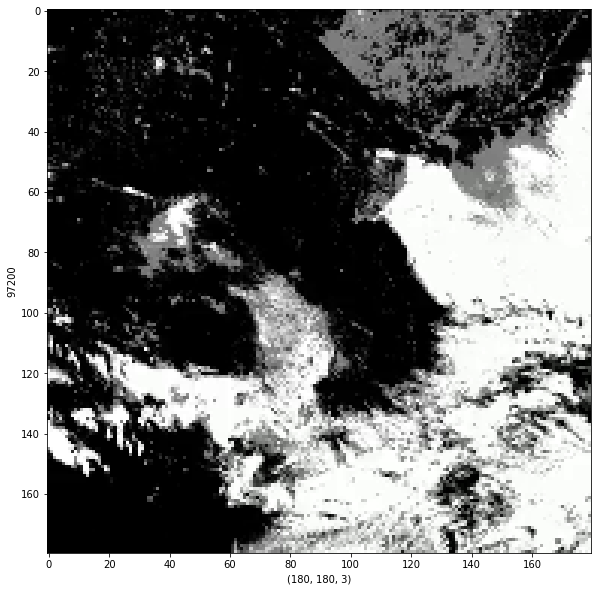

In [ ]:
simple_vision(Main_Array[12])

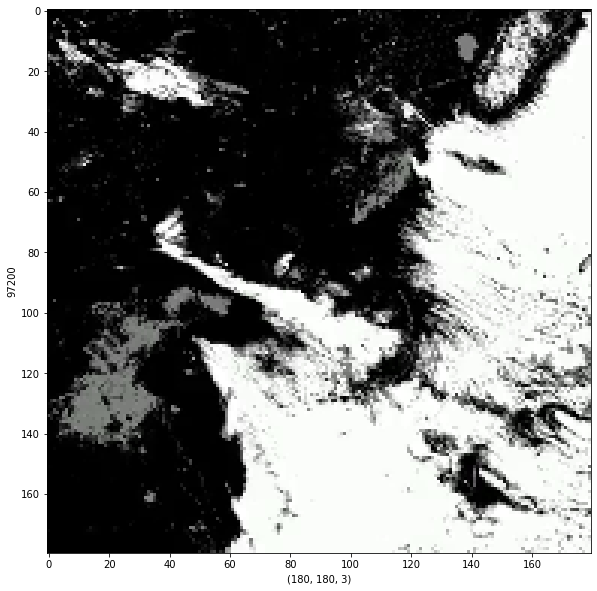

In [ ]:
simple_vision(Main_Array[1])

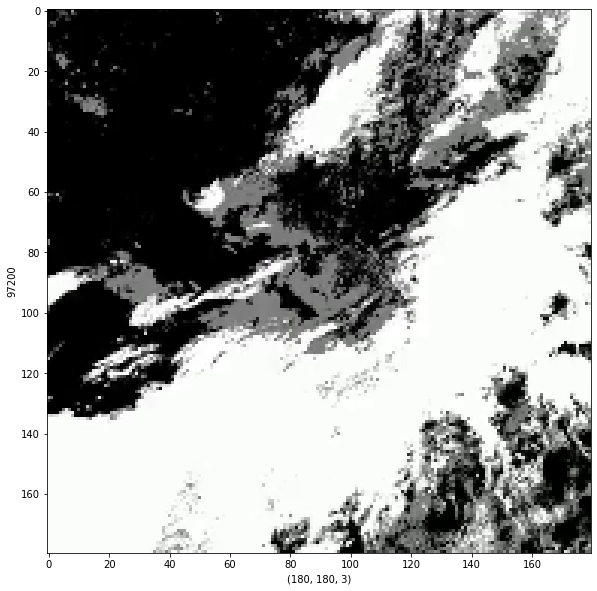

In [ ]:
simple_vision(Main_Array[297])

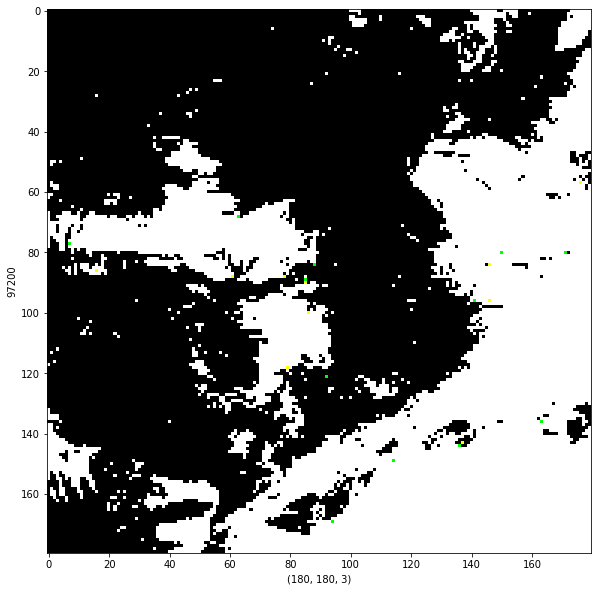

In [ ]:
threshold_vision(Main_Array[26])

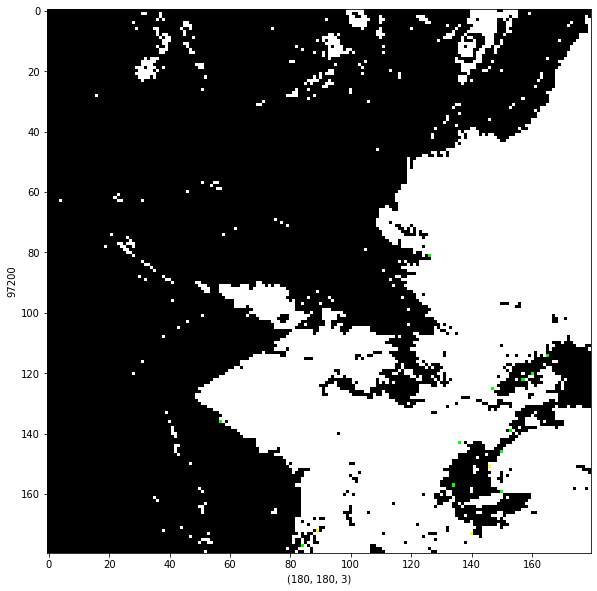

In [ ]:
threshold_vision(Main_Array[6])

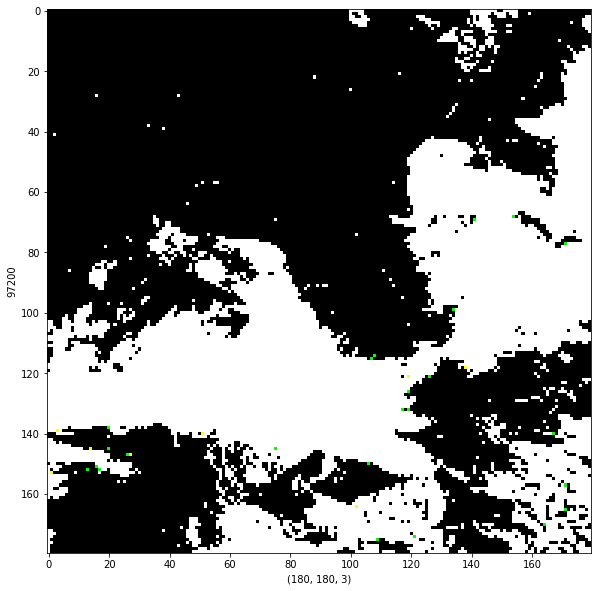

In [ ]:
threshold_vision(Main_Array[16])

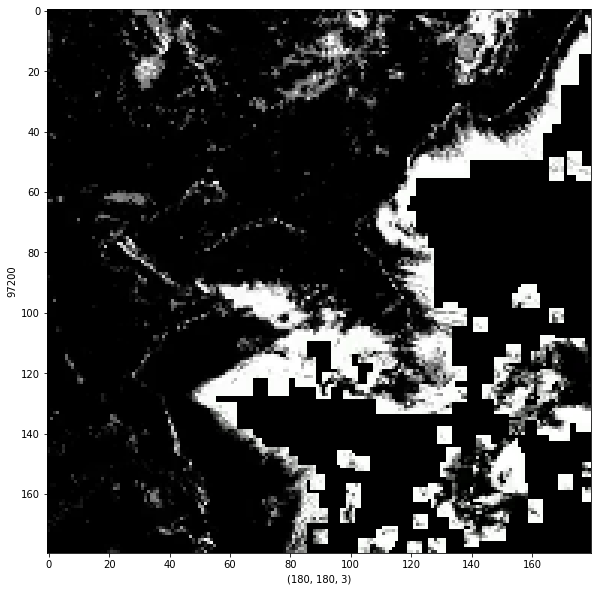

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[6],lower_white,upper_white)

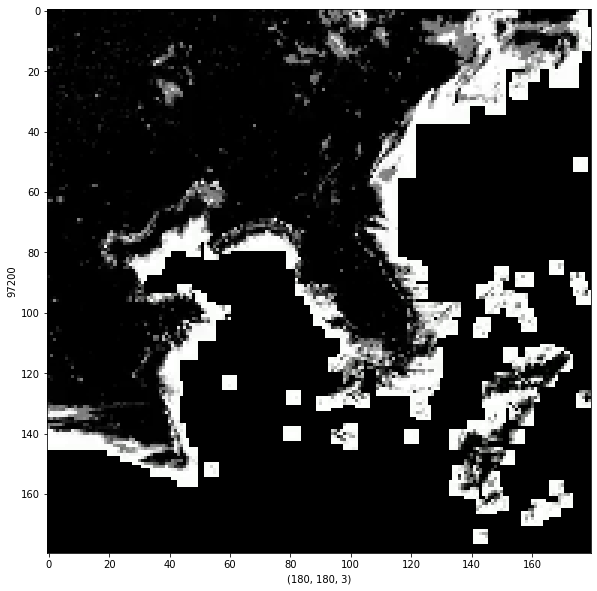

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[56],lower_white,upper_white)

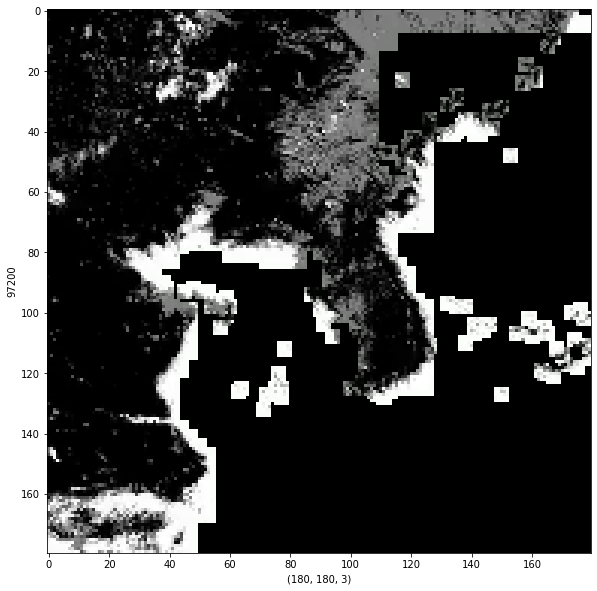

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[60],lower_white,upper_white)

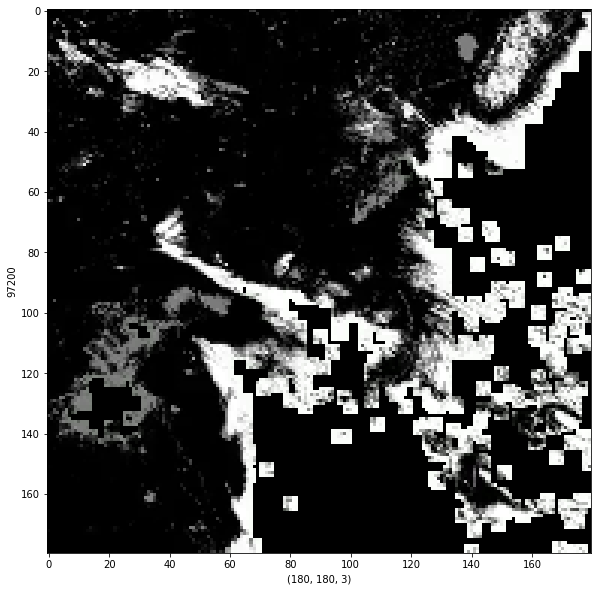

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[1],lower_white,upper_white)

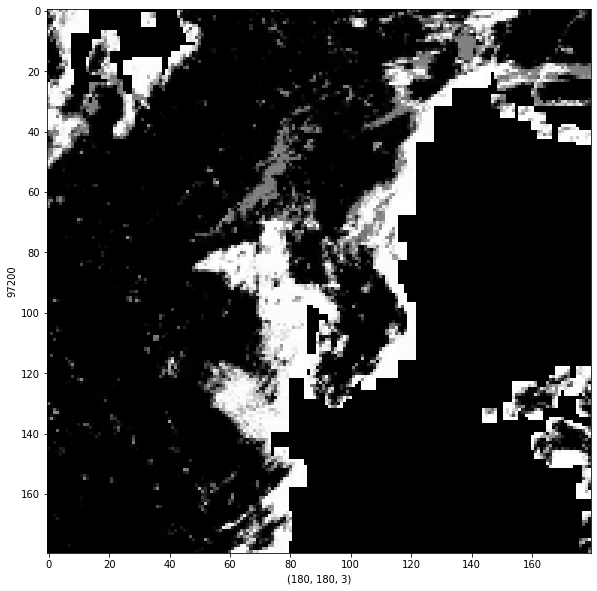

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[100],lower_white,upper_white)

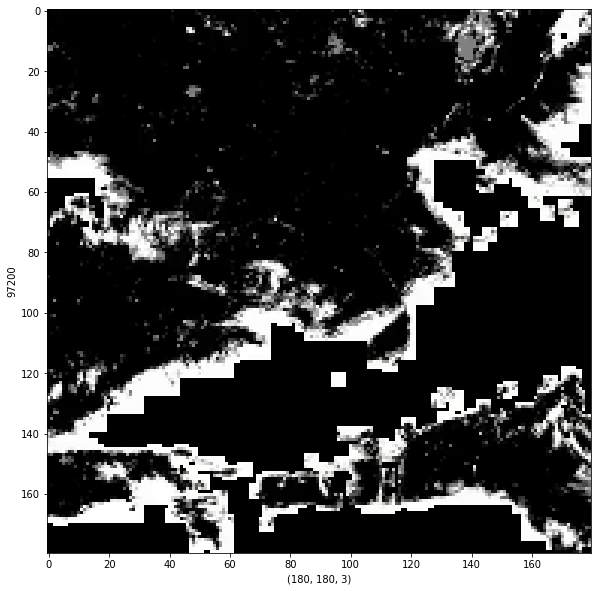

In [ ]:
lower_white = np.array([0,0,0], dtype=np.uint8)
upper_white = np.array([0,0,255], dtype=np.uint8)

White_inRange_vision(Main_Array[23],lower_white,upper_white)


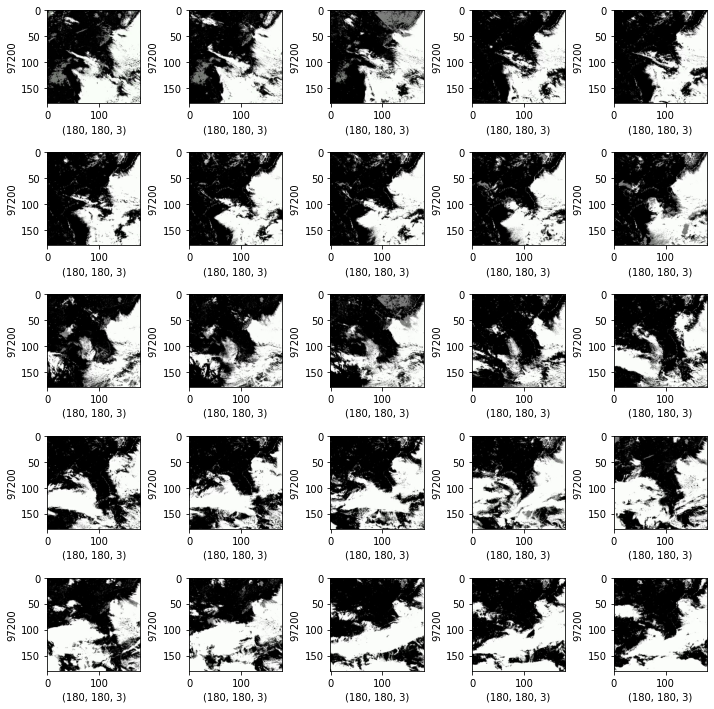

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    IMG_Picking = Main_Array[indexing]
    operations.set_xlabel(IMG_Picking.shape)
    operations.set_ylabel(IMG_Picking.size)
    operations.imshow(IMG_Picking)
    
plt.tight_layout()
plt.show()

In [ ]:
iterations = 60
vector_noise_shape = 180
count_example = 16
batch_size = 12
count_buffer = 60000

seed = tf.random.normal([count_example,vector_noise_shape])

In [ ]:
print(Main_Array.shape)

(298, 180, 180, 3)


In [ ]:
Train_Data = tf.data.Dataset.from_tensor_slices(Main_Array).shuffle(count_buffer).batch(batch_size)

In [ ]:
print(Train_Data)

<BatchDataset element_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.uint8, name=None)>


In [ ]:
def Generator_Model():
    
    
    Model = Sequential()
    #
    Model.add(Dense(90*90*128,use_bias=False,input_shape=(180,)))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
    #
    Model.add(Reshape((90,90,128)))
    #
    Model.add(Conv2DTranspose(128,(3,3),padding="same",use_bias=False))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
    
    Model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', use_bias=False))
    Model.add(BatchNormalization())
    Model.add(LeakyReLU())
    #
    Model.add(Conv2DTranspose(3,(3,3),padding="same",use_bias=False,activation="tanh"))
    
    
    return Model

In [ ]:
Generator = Generator_Model()

In [ ]:
def Discriminator_Model():
    
    Model = Sequential()
    
    Model.add(Conv2D(64,(3,3),padding="same",input_shape=[180,180,3]))
    Model.add(Dropout(0.3))
    Model.add(LeakyReLU())
    
    
    Model.add(Conv2D(128,(3,3),padding="same"))
    Model.add(Dropout(0.3))
    Model.add(LeakyReLU())
    
    Model.add(Flatten())
    Model.add(Dense(1))
    
    return Model

In [ ]:
Discriminator = Discriminator_Model()

In [ ]:
Loss_Function = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def Discriminator_Loss(real_output,fake_output):
    
    real_loss = Loss_Function(tf.ones_like(real_output),real_output)
    fake_loss = Loss_Function(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    
    return total_loss

In [ ]:
def Generator_Loss(fake_output):
    
    return Loss_Function(tf.ones_like(fake_output),fake_output)

In [ ]:
Generator_Optimizer = RMSprop(lr=0.0001,clipvalue=1.0,decay=1e-8)
Discriminator_Optimizer = RMSprop(lr=0.0001,clipvalue=1.0,decay=1e-8)

In [ ]:
def generate_and_save_function(Model, epoch, test_input):
    
    predictions = Model(test_input, training=False)
    fig = plt.figure(figsize=(10, 10))
    
    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.axis('off')

    plt.savefig('images_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
def action_function(images):
    
    random_noise_vector = tf.random.normal([batch_size,vector_noise_shape])
    
    with tf.GradientTape() as Generator_Tape,tf.GradientTape() as Discriminator_Tape:
        Generator_Fake_Images = Generator(random_noise_vector,training=False)
        real_output = Discriminator(images,training=True)
        fake_output = Discriminator(Generator_Fake_Images,training=True)
        Generator_Loss_Output = Generator_Loss(fake_output)
        Discriminator_Loss_Output = Discriminator_Loss(real_output,fake_output)
        
    Generator_Gradients = Generator_Tape.gradient(Generator_Loss_Output,Generator.trainable_variables)
    Discriminator_Gradients = Discriminator_Tape.gradient(Discriminator_Loss_Output,Discriminator.trainable_variables)
    
    Generator_Optimizer.apply_gradients(zip(Generator_Gradients,Generator.trainable_variables))
    Discriminator_Optimizer.apply_gradients(zip(Discriminator_Gradients,Discriminator.trainable_variables))

In [ ]:
def train_function(images_data,iterations):
    for epoch in range(iterations):
        start = time.time()
        for batching in images_data:
            action_function(batching)
            
        display.clear_output(wait=True)
        generate_and_save_function(Generator,epoch+1,seed)
    
    display.clear_output(wait=True)
    generate_and_save_function(Generator,epoch,seed)

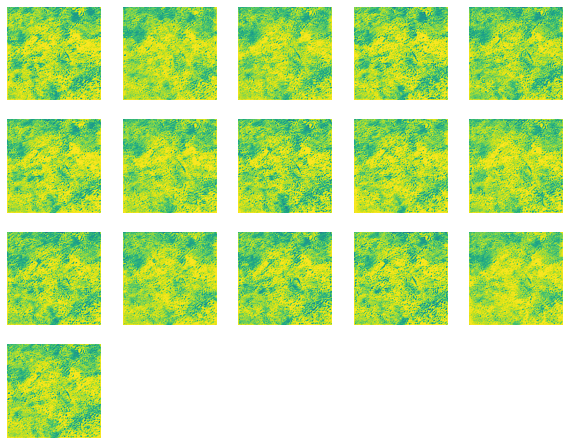

In [ ]:
train_function(Train_Data,iterations)

In [ ]:
Predict_Random_Noise = tf.random.normal(shape=[60,vector_noise_shape])

In [ ]:
Generator_Prediction = Generator(Predict_Random_Noise)

In [ ]:
figure,axis = plt.subplots(3,3,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    Image_Picking = Generator_Prediction[i]
    ax.imshow(Image_Picking,cmap="gray")
    ax.set_xlabel(Image_Picking.shape)
    
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[25])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[55])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[59])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[9])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(Generator_Prediction[1])
plt.show()

In [ ]:
print(Generator_Prediction[1].dtype)
print(type(Generator_Prediction[1]))

In [ ]:
Layer_Output = [layer.output for layer in Generator.layers[:8]]
activation_model = models.Model(inputs=Generator.input,outputs=Layer_Output)

In [ ]:
activations = activation_model.predict(seed)

In [ ]:
first_layer_act = activations[0]
print(first_layer_act.shape)

In [ ]:
plt.matshow(first_layer_act[:10,:10],cmap="viridis")

In [ ]:
plt.matshow(first_layer_act[:1,:10],cmap="viridis")

In [ ]:
Generator.save("Generator.h5")
Discriminator.save("Discriminator.h5")